In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
data = '../Data/clean_data.csv'

def flatten(l):
  out = []
  for item in l:
    if isinstance(item, (list, tuple)):
      out.extend(flatten(item))
    else:
      out.append(item)
  return out

def strip_list(l):
    out = []
    for w in l: 
        w = w.strip('"')
        w = w.strip("'")
        w = w.strip(',')
        w = w.strip('.')
        w = w.strip('(')
        w = w.strip(')')
        w = w.strip(';')
        w = w.lower()
        out.append(w)
    return out

In [3]:
df = pd.read_csv(data)
df.columns

Index(['Unnamed: 0', 'Actors', 'Awards', 'BoxOffice', 'Country', 'DVD',
       'Director', 'Genre', 'Language', 'Metascore', 'Plot', 'Poster',
       'Production', 'Rated', 'Ratings', 'Released', 'Runtime', 'Title',
       'Website', 'Writer', 'Year', 'imdbID', 'imdbRating', 'imdbVotes',
       'rating'],
      dtype='object')

In [4]:
plot_df = df[['Plot', 'rating']]
plot_df = plot_df.dropna(subset=['Plot'])
plot_df['Plot'] = plot_df['Plot'].str.split(' ', n=-1, expand = False)
plot_df.head()

,Plot,rating
0,"[Based, on, the, life, of, Aileen, Wuornos,, a...",3
2,"[A, repressed, female, psychiatrist, wakes, up...",3
3,"[In, an, alternate, Victorian, Age, world,, a,...",0
4,"[Cindy, must, investigate, mysterious, crop, c...",3
5,"[A, Belgian, woman, looks, back, on, her, year...",3


In [5]:
plot_df0 = plot_df[plot_df.rating == 0]
plot_df1 = plot_df[plot_df.rating == 1]
plot_df2 = plot_df[plot_df.rating == 2]
plot_df3 = plot_df[plot_df.rating == 3]
plot_df3.head()

,Plot,rating
0,"[Based, on, the, life, of, Aileen, Wuornos,, a...",3
2,"[A, repressed, female, psychiatrist, wakes, up...",3
4,"[Cindy, must, investigate, mysterious, crop, c...",3
5,"[A, Belgian, woman, looks, back, on, her, year...",3
8,"[A, swinger, on, the, cusp, of, being, a, seni...",3


In [49]:
list_0 = list(flatten(plot_df0.Plot))
list_1 = list(flatten(plot_df1.Plot))
list_2 = list(flatten(plot_df2.Plot))
list_3 = list(flatten(plot_df3.Plot))

In [50]:
list3_stripped = strip_list(list_3)
list2_stripped = strip_list(list_2)
list1_stripped = strip_list(list_1)
list0_stripped = strip_list(list_0)

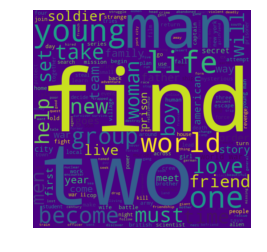

In [48]:
text0 = " ".join(list0_stripped)
wordcloud0 = WordCloud(height=600, width=600, background_color='indigo').generate(text0)
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis('off')
wordcloud0.to_file('Plot_b0.png')
plt.show()

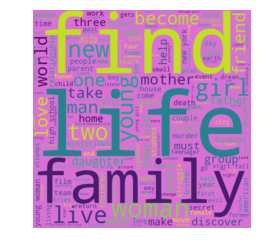

In [47]:
text3 = " ".join(list3_stripped)
wordcloud3 = WordCloud(height=600, width=600, background_color='orchid').generate(text3)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
wordcloud3.to_file('Plot_b3.png')
plt.show()

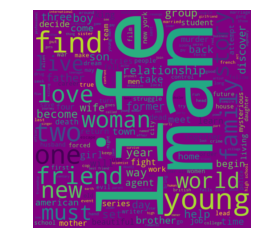

In [46]:
text2 = " ".join(list2_stripped)
wordcloud2 = WordCloud(height=600, width=600, background_color='purple').generate(text2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
wordcloud2.to_file('Plot_b2.png')
plt.show()

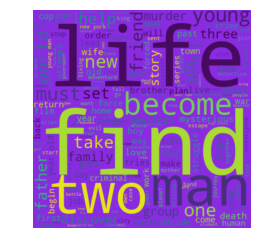

<Figure size 1440x1440 with 0 Axes>

In [34]:
text1 = " ".join(list1_stripped)
wordcloud1 = WordCloud(width=600, height=600, background_color='blueviolet').generate(text1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(20,20))
wordcloud1.to_file('Plot_b1.png')
plt.show()
